监督学习 —— 线性回归

自己实现

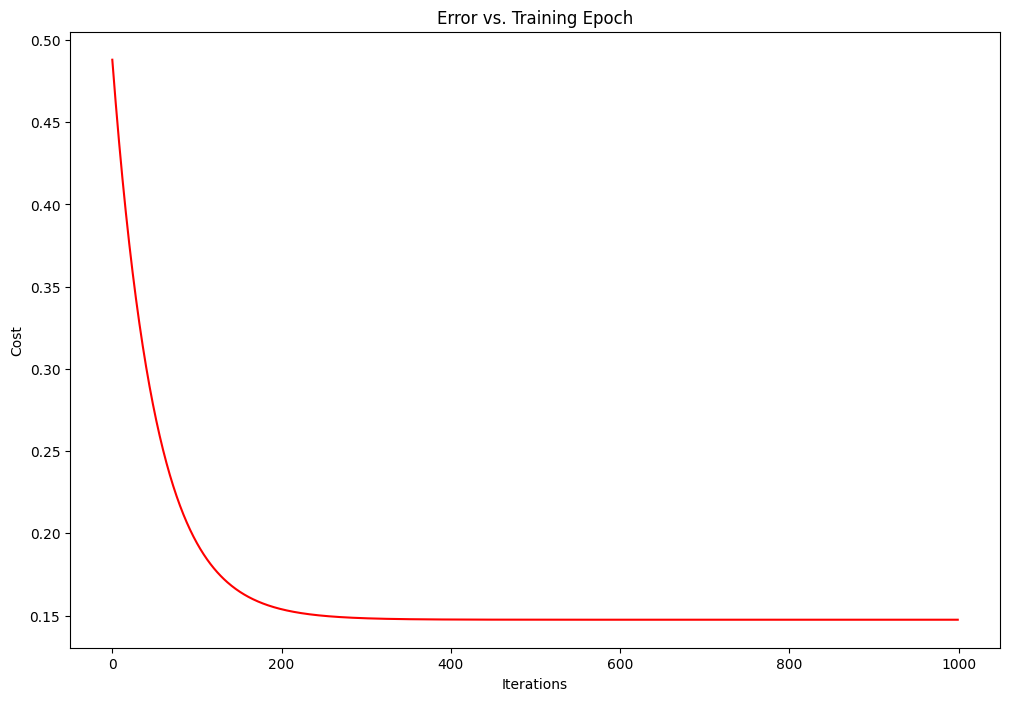

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path =  'ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data = (data - data.mean()) / data.std()            #特征归一化！！显著优化了梯度下降步数
data.head()

data.describe()
#data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))
#plt.show()  #展示图表

#计算代价函数
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

#让我们在训练集中添加一列，以便我们可以使用向量化的解决方案来计算代价和梯度
data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]#X是所有行，去掉最后一列
y = data.iloc[:,cols-1:cols]#X是所有行，最后一列
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0])) #参数向量

computeCost(X, y, theta) #初始代价函数值

#梯度下降：传入步长和迭代次数
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))  #参数向量
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term)) #参数向量中第j个赋值
            
        theta = temp  #参数向量最终取值
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

alpha = 0.01
iters = 1000
g, cost = gradientDescent(X, y, theta, alpha, iters)  #训练，输出训练过程和最终参数

#代价函数值在梯度下降中的变化
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

库实现：使用scikit-learn的线性回归函数

In [ ]:
from sklearn import linear_model
model = linear_model.LinearRegression()  #准备线性回归模型，里面自带代价函数的计算模型和参数
model.fit(X, y)

x = np.array(X[:, 1].A1)  #取出数组
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

TypeError: np.matrix is not supported. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html